In [210]:
# Data preprocessing  
#importing the libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [211]:
#importing the dataset
data = pd.read_csv('data.csv', header=None)

In [212]:
#rename columns
d = data.copy()
d.columns = ["q{}".format(i+1) for i in range(len(d.columns))]
columns_real = ["q309", "q311", "q319", "q24", "q298", "q165", "q25", "q2", "q62"] #"q119"]
names = {
    "q309": "Sex", "q165": "Religion",
    "q311": "Age", "q319": "Education",
    "q24": "Satisfaction_with_life",
    "q25": "Interpersonal_trust",
    "q298": "Employment_status",
    "q2": "Country",
    "q62": "Satisfaction_with_financial_situation_of_household",
    #"q119": "Trust_the_government"
}
columns_real_new = [names.get(x, x) for x in columns_real]
d = d[columns_real]
d = d.rename(columns=names)

In [213]:
#removing missing values (less than -1)
d = d.dropna()
for column in columns_real_new:
     d = d[d[column] > -1]
d["Religion"] = d["Religion"].apply(lambda x: 1 if x > 0 else x)
d.describe()

,Sex,Age,Education,Satisfaction_with_life,Employment_status,Religion,Interpersonal_trust,Country,Satisfaction_with_financial_situation_of_household
count,78964.000000,78964.000000,78964.000000,78964.000000,78964.000000,78964.000000,78964.000000,78964.000000,78964.000000
mean,1.520022,42.051631,5.652576,6.850134,3.398663,0.811927,1.752647,473.172294,5.898143
std,0.499602,16.504042,2.413748,2.258310,2.148131,0.390773,0.431476,241.490487,2.449861
min,1.000000,16.000000,1.000000,1.000000,1.000000,0.000000,1.000000,12.000000,1.000000
25%,1.000000,28.000000,4.000000,5.000000,1.000000,1.000000,2.000000,276.000000,4.000000
50%,2.000000,40.000000,6.000000,7.000000,3.000000,1.000000,2.000000,458.000000,6.000000
75%,2.000000,54.000000,8.000000,8.000000,5.000000,1.000000,2.000000,702.000000,8.000000
max,2.000000,99.000000,9.000000,10.000000,8.000000,1.000000,2.000000,887.000000,10.000000


In [214]:
#defining countries 
countries = """
     -5 'Missing; Unknown'
     -4 'Not asked in survey'
     -3 'Not applicable'
     -2 'No answer'
     -1 'Don't know'
     4 'Afghanistan'
     8 'Albania'
     12 'Algeria'
     16 'American Samoa'
     20 'Andorra'
     24 'Angola'
     28 'Antigua'
     31 'Azerbaijan'
     32 'Argentina'
     36 'Australia'
     40 'Austria'
     48 'Bahrain'
     50 'Bangladesh'
     51 'Armenia'
     52 'Barbados'
     56 'Belgium'
     60 'Bermuda'
     64 'Bhutan'
     68 'Bolivia'
     70 'Bosnia Herzegovina'
     72 'Botswana'
     76 'Brazil'
     84 'Belize'
     100 'Bulgaria'
     101 'SrpSka Republic'
     104 'Myanmar'
     108 'Burundi'
     112 'Belarus'
     116 'Cambodia'
     120 'Cameroon'
     124 'Canada'
     132 'Cape Verde'
     144 'Sri Lanka'
     148 'Chad'
     152 'Chile'
     156 'China'
     158 'Taiwan'
     170 'Colombia'
     180 'D.R. Congo'
     184 'Cook Islands'
     188 'Costa Rica'
     191 'Croatia'
     192 'Cuba'
     196 'Cyprus'
     197 'Cyprus (T)'
     203 'Czech Rep.'
     204 'Benin'
     208 'Denmark'
     214 'Dominican Rep.'
     218 'Ecuador'
     222 'El Salvador'
     226 'Eq.Guinea'
     231 'Ethiopia'
     232 'Eritrea'
     233 'Estonia'
     246 'Finland'
     250 'France'
     268 'Georgia'
     270 'Gambia'
     275 'Palestine'
     276 'Germany'
     288 'Ghana'
     292 'Gibraltar'
     300 'Greece'
     320 'Guatemala'
     324 'Guinea'
     328 'Guyana'
     332 'Haiti'
     340 'Honduras'
     344 'Hong Kong'
     348 'Hungary'
     352 'Iceland'
     356 'India'
     360 'Indonesia'
     364 'Iran'
     368 'Iraq'
     372 'Ireland'
     376 'Israel'
     380 'Italy'
     384 'Côte d'Ivoire'
     388 'Jamaica'
     392 'Japan'
     398 'Kazakhstan'
     400 'Jordan'
     404 'Kenya'
     408 'North Korea'
     410 'South Korea'
     414 'Kuwait'
     417 'Kyrgyzstan'
     418 'Laos'
     422 'Lebanon'
     426 'Lesotho'
     428 'Latvia'
     430 'Liberia'
     434 'Libya'
     438 'Liechtenstein'
     440 'Lithuania'
     442 'Luxembourg'
     450 'Madagascar'
     454 'Malawi'
     458 'Malaysia'
     466 'Mali'
     470 'Malta'
     474 'Martinique'
     478 'Mauritania'
     480 'Mauritius'
     484 'Mexico'
     492 'Monaco'
     496 'Mongolia'
     498 'Moldova'
     499 'Montenegro'
     504 'Morocco'
     508 'Mozambique'
     512 'Oman'
     516 'Namibia'
     524 'Nepal'
     528 'Netherlands'
     554 'New Zealand'
     558 'Nicaragua'
     562 'Niger'
     566 'Nigeria'
     578 'Norway'
     586 'Pakistan'
     591 'Panama'
     598 'Papua New Guinea'
     600 'Paraguay'
     604 'Peru'
     608 'Philippines'
     616 'Poland'
     620 'Portugal'
     624 'Guinea-Bissau'
     626 'Timor-Leste'
     630 'Puerto Rico'
     634 'Qatar'
     642 'Romania'
     643 'Russia'
     646 'Rwanda'
     682 'Saudi Arabia'
     686 'Senegal'
     688 'Serbia'
     690 'Seychelles'
     694 'Sierra Leone'
     702 'Singapore'
     703 'Slovakia'
     704 'Viet Nam'
     705 'Slovenia'
     706 'Somalia'
     710 'South Africa'
     716 'Zimbabwe'
     724 'Spain'
     736 'Sudan'
     740 'Suriname'
     748 'Swaziland'
     752 'Sweden'
     756 'Switzerland'
     760 'Syria'
     762 'Tajikistan'
     764 'Thailand'
     768 'Togo'
     780 'Trinidad and Tobago'
     784 'United Arab Emirates'
     788 'Tunisia'
     792 'Turkey'
     795 'Turkmenistan'
     800 'Uganda'
     804 'Ukraine'
     807 'Macedonia'
     818 'Egypt'
     826 'United Kingdom'
     834 'Tanzania'
     840 'United States'
     850 'U.S. Virgin Islands'
     854 'Burkina Faso'
     858 'Uruguay'
     860 'Uzbekistan'
     862 'Venezuela'
     887 'Yemen'
     891 'Serbia and Montenegro'
     894 'Zambia'
     900 'West Germany'
     901 'East Germany'
     902 'Tambov'
     903 'Moscow'
     904 'Basque Country'
     906 'Andalusia'
     907 'Galicia'
     908 'Great Britain'
     909 'North Ireland'
     910 'Valencia'
     911 'Serbia'
     912 'Montenegro'
     913 'Serbian Bosnia'
     914 'Bosnia'
     915 'Kosovo'
     916 'Flanders-Belgium'
     917 'Israel (Jews)'
     918 'Israel (Arabs)'
"""

In [215]:
#convert country string into a dictionary
import re
countries = countries.split('\n')
countries = [x.strip() for x in countries if x]
country_re = r"([\-]{0,1}[0-9]+)[ ]*\'(.*)\'"
countries = [re.findall(country_re, x)[0] for x in countries]
countries = {int(k): v for k, v in countries}

In [216]:
#definig regions
africa = """Burundi
Comoros
Djibouti
Eritrea
Libya
Ethiopia
Kenya
Cook Islands
Madagascar
Malawi
Mauritius
Mayotte
Mozambique
Reunion
Rwanda
Seychelles
Somalia
Tanzania, United Republic of
Uganda
Zambia
Zimbabwe
Angola
Cameroon
Central African Republic
Chad
Congo
D.R. Congo
Eq.Guinea
Gabon
Sao Tome and Principe
Algeria
Egypt
Libyan Arab Jamahiriya
Morroco
Côte d'Ivoire
South Sudan
Sudan
Tunisia
Western Sahara
Botswana
Eswatini
Lesotho
Namibia
South Africa
Benin
Burkina Faso
Cape Verde
Cote d'Ivoire
Gambia
Ghana
Guinea
Guinea-Bissau
Liberia
Mali
Mauritania
Niger
Nigeria
Tanzania
Morocco
Saint Helena
Senegal
Sierra Leone
Swaziland
Togo""".split("\n")
africa
carribean = """Anguilla
Antigua
Aruba
Bahamas
Barbados
Bonaire, Saint Eustatius and Saba
British Virgin Islands
Cayman Islands
Cuba
Curaçao
Dominica
Dominican Rep.
Grenada
Guadeloupe
Haiti
Jamaica
U.S. Virgin Islands
Martinique
Monserrat
Puerto Rico
Saint-Barthélemy
St. Kitts and Nevis
Saint Lucia
Saint Martin
Saint Vincent and the Grenadines
Sint Maarten
Trinidad and Tobago
Turks and Caicos Islands
Virgin Islands""".split("\n")
carribean
camerica = """Belize
Costa Rica
El Salvador
Guatemala
Honduras
Mexico
Nicaragua
Panama""".split("\n")
camerica
samerica = """Argentina
Bolivia
Brazil
Chile
Colombia
Ecuador
Falkland Islands
French Guiana
Guyana
Paraguay
Peru
Suriname
Uruguay
Venezuela""".split("\n")
samerica
namerica = """Bermuda
Canada
Greenland
Saint Pierre and Miquelon
United States""".split("\n")
namerica
asia = """Afghanistan
Armenia
Azerbaijan
Bangladesh
Bhutan
Brunei Darussalam
Cambodia
China
Georgia
Hong Kong
India
Indonesia
Japan
Kazakhstan
North Korea
South Korea
Kyrgyzstan
Laos
Macao
Malaysia
Maldives
Mongolia
Myanmar
Nepal
Pakistan
Phillipines
Philippines
Singapore
Sri Lanka
Taiwan
Timor-Leste
Tajikistan
Thailand
Timor Leste
Turkmenistan
Viet Nam
Uzbekistan
Vietnam """.split("\n")
asia
europe = """Albania
Andorra
Belarus
Bosnia Herzegovina
Bosnia
Croatia
Faroe Islands
Gibraltar
Guerney and Alderney
Iceland
Jersey
North Ireland
Kosovo
Liechtenstein
Man, Island of
Moldova
Monaco
Montenegro
North Macedonia
Norway
Russia
San Marino
SrpSka Republic
Serbia
Svalbard and Jan Mayen Islands
Switzerland
Turkey
Ukraine
United Kingdom
Vatican City State
Austria
Belgium
Bulgaria
Cyprus
Cyprus (T)
Czech Rep.
Denmark
Estonia
Finland
France
Germany
West Germany
East Germany
Greece
Hungary
Ireland
Italy
Latvia
Lithuania
Luxembourg
Malta
Netherlands
Macedonia
Poland
Portugal
Great Britain
Romania
Slovakia
Slovenia
Serbia and Montenegro
Spain
Valencia
Galicia
Andalusia
Flanders-Belgium
Basque Country
Serbian Bosnia
Tambov
Moscow
Sweden""".split("\n")
europe
mideast = """Bahrain
Iraq
Iran
Israel (Jews)
Israel (Arabs)
Israel
Jordan
Kuwait
Lebanon
Oman
Palestine
Qatar
Saudi Arabia
Syria
United Arab Emirates
Yemen""".split("\n")
mideast
oceania = """Australia
Fiji
French Polynesia
Guam
Kiribati
Marshall Islands
Micronesia
New Caledonia
New Zealand
Papua New Guinea
Samoa
American Samoa
Solomon, Islands
Tonga
Vanuatu""".split("\n")
oceania
regions = {'Africa': africa, 'Carribean': carribean, 'Central America': camerica, 'South America': samerica, 'Northern America': namerica, 'Asia': asia, 'Europe': europe, 'Middle East': mideast, 'Oceania': oceania}

In [217]:
#adding region column
country_to_region = {
    c: r
    for r, c_l in regions.items()
    for c in c_l
}
int_country_to_region = {k: f"Country_{country_to_region.get(c)}" for k, c in countries.items()}
d["Region"] = d["Country"].apply(int_country_to_region.get)

In [218]:
#transforming region into wide format
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
reg_encoded = enc.fit_transform(d[["Region"]])
reg_encoded = pd.DataFrame(
    reg_encoded.toarray(),
    columns=enc.categories_[0]
)
d2 = pd.concat([d.reset_index(), reg_encoded], axis=1)

d2 = d2.drop(columns=["Country", "Region", "index"])

In [219]:
d2["Interpersonal_trust"] = d2["Interpersonal_trust"].apply(lambda x: 0 if x == 2 else x)
# 2 is "don;t trust", then remap to 0 is don't trust and 1 is trust
d2["Sex"] = d2["Sex"].apply(lambda x: 0 if x == 2 else x)
# Set Female to 0, Male to 1
d2.describe()

,Sex,Age,Education,Satisfaction_with_life,Employment_status,Religion,Interpersonal_trust,Satisfaction_with_financial_situation_of_household,Country_Africa,Country_Asia,Country_Carribean,Country_Central America,Country_Europe,Country_Middle East,Country_Northern America,Country_Oceania,Country_South America
count,78964.000000,78964.000000,78964.000000,78964.000000,78964.000000,78964.000000,78964.000000,78964.000000,78964.000000,78964.000000,78964.000000,78964.000000,78964.000000,78964.000000,78964.000000,78964.000000,78964.000000
mean,0.479978,42.051631,5.652576,6.850134,3.398663,0.811927,0.247353,5.898143,0.187136,0.337382,0.012347,0.025151,0.233144,0.065156,0.027202,0.022187,0.090294
std,0.499602,16.504042,2.413748,2.258310,2.148131,0.390773,0.431476,2.449861,0.390023,0.472819,0.110431,0.156584,0.422836,0.246803,0.162673,0.147293,0.286605
min,0.000000,16.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28.000000,4.000000,5.000000,1.000000,1.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,40.000000,6.000000,7.000000,3.000000,1.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,54.000000,8.000000,8.000000,5.000000,1.000000,0.000000,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,99.000000,9.000000,10.000000,8.000000,1.000000,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [220]:
#from pandas_profiling import ProfileReport
#profile = ProfileReport(d5, title='Data Report', explorative=True)
#profile.to_file('report_detailed.html')

<AxesSubplot:ylabel='Frequency'>

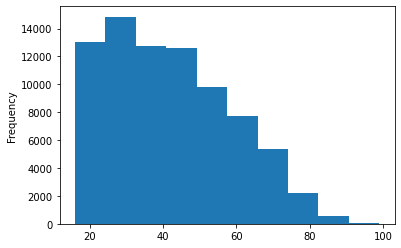

In [221]:
# Age distribution
d2['Age'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

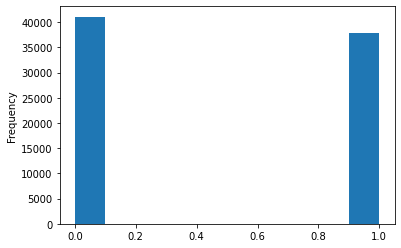

In [222]:
# Sex distribution
d2['Sex'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

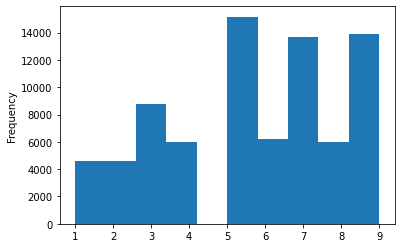

In [223]:
# Education distribution
d2['Education'].plot(kind = 'hist', bins=8)

<AxesSubplot:ylabel='Frequency'>

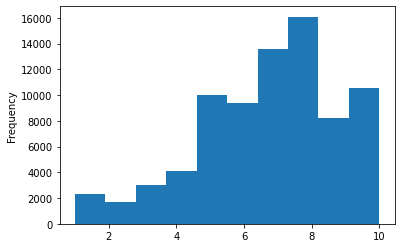

In [224]:
#Satisfaction_with_life distribution
d2['Satisfaction_with_life'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

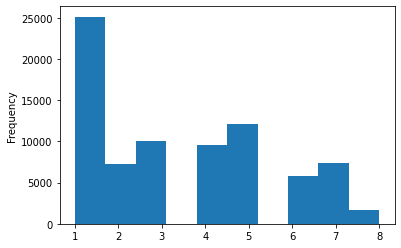

In [225]:
#Employment_status distribution
d2['Employment_status'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

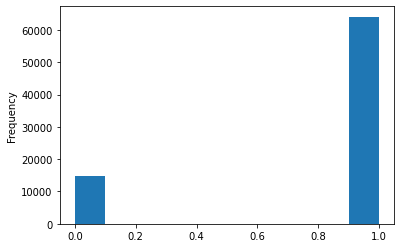

In [226]:
#Religion distribution
d['Religion'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

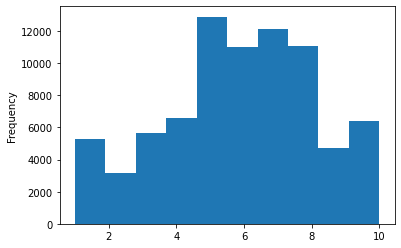

In [227]:
#Satisfaction_with_financial_situation_of_household distribution
d['Satisfaction_with_financial_situation_of_household'].plot(kind = 'hist')

In [228]:
#Logistic regression

In [229]:
#Splitting the dataset into the Training set and Test set
X = d2[[c for c in d2.columns if c != "Interpersonal_trust"]]
y = d2["Interpersonal_trust"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [230]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

In [231]:
d2[[c for c in d2.columns if c != "Interpersonal_trust"]].columns

Index(['Sex', 'Age', 'Education', 'Satisfaction_with_life',
       'Employment_status', 'Religion',
       'Satisfaction_with_financial_situation_of_household', 'Country_Africa',
       'Country_Asia', 'Country_Carribean', 'Country_Central America',
       'Country_Europe', 'Country_Middle East', 'Country_Northern America',
       'Country_Oceania', 'Country_South America'],
      dtype='object')

In [232]:
X_train1 =X_train
X_test1 =X_test

In [233]:
import statsmodels.api as sm
lr = sm.Logit(y_train,X_train).fit(method='newton', maxiter=2000)

print(lr.summary2())

         Current function value: 0.661317
         Iterations: 2000
                           Results: Logit
Model:              Logit               Pseudo R-squared: -0.182    
Dependent Variable: Interpersonal_trust AIC:              83582.1565
Date:               2020-12-16 23:21    BIC:              83717.9605
No. Observations:   63171               Log-Likelihood:   -41776.   
Df Model:           14                  LL-Null:          -35344.   
Df Residuals:       63156               LLR p-value:      1.0000    
Converged:          0.0000              Scale:            1.0000    
No. Iterations:     2000.0000                                       
--------------------------------------------------------------------
       Coef.    Std.Err.     z     P>|z|      [0.025       0.975]   
--------------------------------------------------------------------
x1    -0.0017      0.0083  -0.2050 0.8376       -0.0181       0.0146
x2     0.0796      0.0089   8.9855 0.0000        0.0622       

c:\users\masta\miniconda3\envs\data_analysis\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [234]:
# Features selection
X_train1 = X_train1[:,[1,2,3,4,5,6]]
X_test1 = X_test1[:,[1,2,3,4,5,6]]

In [235]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

In [236]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(
    random_state=68, 
    solver='saga'
#    class_weight='balanced',
#    penalty='l1', solver='liblinear'
).fit(X_train1, y_train)

In [237]:
# Predicting the Test set results
y_pred = reg.predict(X_test1)
reg.score(X_test1,y_test)

0.7562844298106756

[1.62373326 0.62373326 0.61648166 ... 0.07730092 0.07512552 0.07509756]
[0.00000000e+00 2.56344527e-04 5.12689054e-04 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]


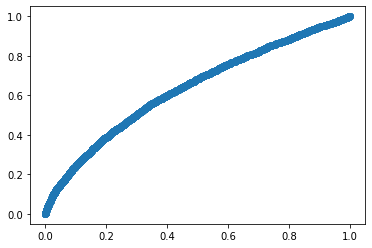

In [239]:
from sklearn.metrics import roc_curve, roc_auc_score
y_score = reg.predict_proba(X_test1)[:,1]
tpr, fpr,  thresh = roc_curve(y_test, y_score)
from matplotlib import pyplot as plt
plt.scatter(tpr, fpr)
roc_auc_score(y_test, y_score)
print(thresh)
print(fpr)

In [240]:
def predict_thresh(clf, x, thresh):
    y_prob = clf.predict_proba(x)
    y_prob = y_prob[:,1]
    y_tst = np.array([d>thresh for d in y_prob])
    return y_tst

In [241]:
from sklearn.metrics import classification_report
threshold = 0.4
print(classification_report(y_train, predict_thresh(reg, X_train1, threshold)))
print(classification_report(y_test, predict_thresh(reg, X_test1, threshold)))
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predict_thresh(reg, X_test1, threshold))
print(cm)
print(reg.score(X_train1, y_train))

              precision    recall  f1-score   support

           0       0.77      0.94      0.85     47540
           1       0.49      0.16      0.24     15631

    accuracy                           0.75     63171
   macro avg       0.63      0.55      0.55     63171
weighted avg       0.70      0.75      0.70     63171

              precision    recall  f1-score   support

           0       0.77      0.94      0.85     11892
           1       0.49      0.16      0.24      3901

    accuracy                           0.75     15793
   macro avg       0.63      0.55      0.55     15793
weighted avg       0.70      0.75      0.70     15793

[[11231   661]
 [ 3278   623]]
0.7555365594972376


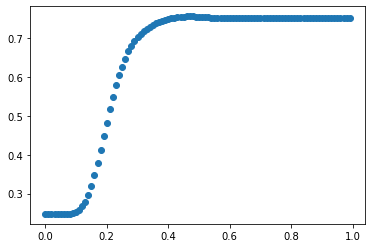

In [242]:
from sklearn.metrics import accuracy_score
thresholds = np.arange(0,1,0.01)
accs = [accuracy_score(y_train, predict_thresh(reg, X_train1, thresgold)) for thresgold in thresholds]
plt.scatter(thresholds, accs)

In [243]:
max(accs)

0.757087904259866

In [ ]:
#estimator = LogisticRegression(class_weight='balanced', penalty='l1', solver='liblinear')
#selector = RFE(estimator, n_features_to_select=5, step=1)
#selector = selector.fit(X_train, y_train)
#selector.support_

In [ ]:
#cols = [c for c in d2.columns if c != 'Interpersonal_trust']
#dc = dict(enumerate(selector.support_))
#dc = {k: v for k, v in dc.items() if v}
#features = []
#for i in dc:
    #features.append(cols[i])
#features

In [ ]:
#Балансирование кластеров (отсечение избыточных кластеров в тренировочной выборке)

In [244]:
from itertools import groupby

In [245]:
for cl, group in groupby(sorted(y_train)):
    print(cl, len(list(group)))

0 47540
1 15631


In [246]:
y_train.index = range(y_train.shape[0])

In [247]:
y_train_1 = y_train[y_train == 1]
X_train_1 = X_train[y_train_1.index,:]

In [248]:
from numpy.random import choice
y_train_0 = y_train[y_train == 0]
y_train_0 = y_train_0.sample(n=y_train_1.shape[0], replace=False)
X_train_0 = X_train[y_train_0.index,:]
X_train_0.shape

(15631, 16)

In [249]:
X_train_0

array([[-0.9621994 ,  0.90585975, -0.68457014, ..., -0.1680997 ,
        -0.14900002, -0.31644522],
       [ 1.03928562,  0.2387182 , -1.09887743, ..., -0.1680997 ,
        -0.14900002, -0.31644522],
       [ 1.03928562, -0.12517719, -0.27026285, ..., -0.1680997 ,
        -0.14900002,  3.16010457],
       ...,
       [-0.9621994 , -1.45946028,  0.55835172, ..., -0.1680997 ,
        -0.14900002, -0.31644522],
       [-0.9621994 , -0.42842334,  0.14404443, ..., -0.1680997 ,
        -0.14900002, -0.31644522],
       [ 1.03928562,  1.51235206, -0.27026285, ..., -0.1680997 ,
        -0.14900002, -0.31644522]])

In [250]:
from numpy import concatenate
X_train_01 = concatenate([X_train_0, X_train_1])
y_train_01 = concatenate([y_train_0, y_train_1])

In [251]:
import statsmodels.api as sm
lr = sm.Logit(y_train_01,X_train_01).fit(method='newton', maxiter=2000)

print(lr.summary2())

Optimization terminated successfully.
         Current function value: 0.638298
         Iterations 7
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.079     
Dependent Variable:  y                AIC:              39938.9432
Date:                2020-12-16 23:22 BIC:              40064.1956
No. Observations:    31262            Log-Likelihood:   -19954.   
Df Model:            14               LL-Null:          -21669.   
Df Residuals:        31247            LLR p-value:      0.0000    
Converged:           1.0000           Scale:            1.0000    
No. Iterations:      7.0000                                       
------------------------------------------------------------------
     Coef.    Std.Err.     z     P>|z|      [0.025       0.975]   
------------------------------------------------------------------
x1   0.0048      0.0121   0.3951 0.6928       -0.0189       0.0285
x2   0.1073      0.0128   8.4009 0.0000        0.0823

In [254]:
X_train2 =X_train_01[:,[1,2,3,4,5,6]]
X_test2 =X_test[:,[1,2,3,4,5,6]]

In [255]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(
    random_state=68, 
    solver='saga'
#    class_weight='balanced',
#    penalty='l1', solver='liblinear'
).fit(X_train2, y_train_01)

In [257]:
# Predicting the Test set results
y_pred = reg.predict(X_test2)
reg.score(X_test2,y_test)

0.6210346355980497

In [260]:
from sklearn.metrics import classification_report
threshold = 0.4
print(classification_report(y_train_01, predict_thresh(reg, X_train2, threshold)))
print(classification_report(y_test, predict_thresh(reg, X_test2, threshold)))
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predict_thresh(reg, X_test2, threshold))
print(cm)
print(reg.score(X_train2, y_train_01))

              precision    recall  f1-score   support

           0       0.62      0.26      0.37     15631
           1       0.53      0.84      0.65     15631

    accuracy                           0.55     31262
   macro avg       0.58      0.55      0.51     31262
weighted avg       0.58      0.55      0.51     31262

              precision    recall  f1-score   support

           0       0.84      0.26      0.40     11892
           1       0.27      0.85      0.41      3901

    accuracy                           0.41     15793
   macro avg       0.56      0.56      0.41     15793
weighted avg       0.70      0.41      0.40     15793

[[3087 8805]
 [ 579 3322]]
0.601113172541744


0.6341279302322114
[1.83224473 0.83224473 0.82688891 ... 0.21218116 0.20674104 0.20514   ]
[0.00000000e+00 2.56344527e-04 5.12689054e-04 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]


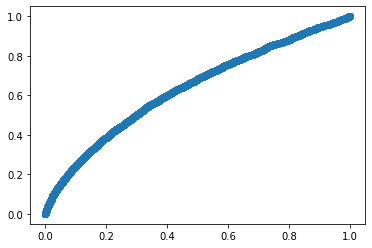

In [261]:
from sklearn.metrics import roc_curve, roc_auc_score
y_score = reg.predict_proba(X_test2)[:,1]
tpr, fpr,  thresh = roc_curve(y_test, y_score)
from matplotlib import pyplot as plt
plt.scatter(tpr, fpr)
print(roc_auc_score(y_test, y_score))
print(thresh)
print(fpr)

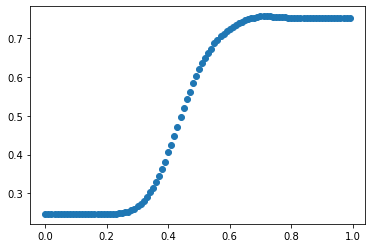

In [263]:
from sklearn.metrics import accuracy_score
thresholds = np.arange(0,1,0.01)
accs = [accuracy_score(y_test, predict_thresh(reg, X_test2, thresgold)) for thresgold in thresholds]
plt.scatter(thresholds, accs)

In [264]:
print(max(accs))
print(max(thresholds, key=lambda x: accs[list(thresholds).index(x)]))

0.7569809409231938
0.71


In [265]:
from sklearn.metrics import classification_report
threshold = 0.71
print(classification_report(y_train_01, predict_thresh(reg, X_train2, threshold)))
print(classification_report(y_test, predict_thresh(reg, X_test2, threshold)))
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predict_thresh(reg, X_test2, threshold))
print(cm)

              precision    recall  f1-score   support

           0       0.52      0.98      0.68     15631
           1       0.78      0.09      0.16     15631

    accuracy                           0.53     31262
   macro avg       0.65      0.53      0.42     31262
weighted avg       0.65      0.53      0.42     31262

              precision    recall  f1-score   support

           0       0.77      0.98      0.86     11892
           1       0.55      0.09      0.15      3901

    accuracy                           0.76     15793
   macro avg       0.66      0.53      0.50     15793
weighted avg       0.71      0.76      0.68     15793

[[11622   270]
 [ 3568   333]]


In [266]:
# Support Vector Machine (SVM)

In [267]:
# Fitting SVM to the Training set 
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf', random_state = 10).fit(X_train, y_train)

In [268]:
# Predicting the Test set results
y_pred = svm.predict(X_test)
svm.score(X_test,y_test)

0.7655290318495536

In [269]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[11448   444]
 [ 3259   642]]


In [ ]:
# SVM, используя сбалансированную тренировочную выборку

In [270]:
# Fitting SVM to the Training set 
from sklearn.svm import SVC
svm01 = SVC(kernel = 'rbf', random_state = 10).fit(X_train_01, y_train_01)

In [299]:
# Predicting the Test set results
y_pred = svm01.predict(X_test)
svm01.score(X_test,y_test)

0.6492749952510606

In [272]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[7782 4110]
 [1429 2472]]


In [273]:
# K-Nearest Neighbors (K-NN)

Minimum error:- 0.2351041600709175 at K = 47


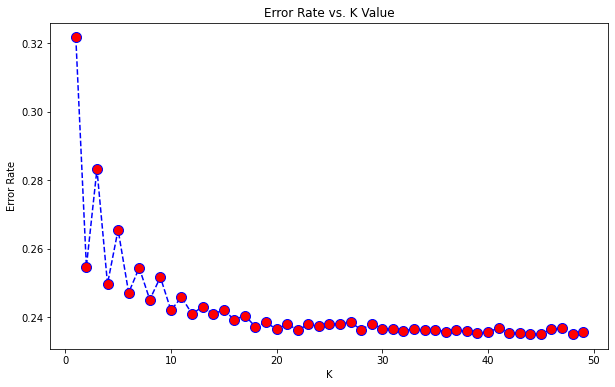

In [274]:
# Optimal K 
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,50):
     knn = KNeighborsClassifier(n_neighbors=i)
     knn.fit(X_train,y_train)
     pred_i = knn.predict(X_test)
     error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [275]:
# Fitting K-NN to the Training set
knn = KNeighborsClassifier(n_neighbors = 47, metric = 'minkowski', p = 2).fit(X_train, y_train)

In [276]:
# Predicting the Test set results
y_pred = knn.predict(X_test)
knn.score(X_test,y_test)

0.7632495409358576

In [277]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[11234   658]
 [ 3081   820]]


In [279]:
# Naive Bayes

In [280]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB().fit(X_train, y_train)

In [281]:
# Predicting the Test set results
y_pred = nb.predict(X_test)
nb.score(X_test,y_test)

0.6100804153738998

In [282]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[7011 4881]
 [1277 2624]]


In [283]:
# Naive Bayes, используя сбалансированную тренировочную выборку

In [284]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB().fit(X_train_01, y_train_01)

In [ ]:
# Predicting the Test set results
y_pred = nb.predict(X_test_01)
nb.score(X_test_01,y_test)

In [286]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[5030 6862]
 [ 791 3110]]


In [287]:
# K-Means Clustering

In [288]:
#rename columns
d3 = data.copy()
d3.columns = ["q{}".format(i+1) for i in range(len(d3.columns))]
columns_real = ["q309", "q311", "q319", "q24", "q298", "q165", "q25", "q62"] 
names = {
    "q309": "Sex", "q165": "Religion",
    "q311": "Age", "q319": "Education",
    "q24": "Satisfaction_with_life",
    "q25": "Interpersonal_trust",
    "q298": "Employment_status",
    "q62": "Satisfaction_with_financial_situation_of_household",
}
columns_real_new = [names.get(x, x) for x in columns_real]
d3 = d3[columns_real]
d3 = d3.rename(columns=names)
d3.describe()

,Sex,Age,Education,Satisfaction_with_life,Employment_status,Religion,Interpersonal_trust,Satisfaction_with_financial_situation_of_household
count,90350.000000,90350.000000,90349.000000,90350.000000,90350.000000,90350.000000,90350.000000,90350.000000
mean,1.514388,41.964361,5.569392,6.775695,3.273536,5531.439823,1.668866,5.877643
std,0.524561,16.583474,2.571788,2.362439,2.300889,60360.296109,0.652453,2.527539
min,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000
25%,1.000000,28.000000,4.000000,5.000000,1.000000,6.000000,1.000000,4.000000
50%,2.000000,40.000000,6.000000,7.000000,3.000000,49.000000,2.000000,6.000000
75%,2.000000,54.000000,8.000000,8.000000,5.000000,62.000000,2.000000,8.000000
max,2.000000,99.000000,9.000000,10.000000,8.000000,710002.000000,2.000000,10.000000


In [289]:
#removing missing values (less than -1)
d3 = d3.dropna()
for column in columns_real_new:
     d3 = d3[d3[column] > -1]
d3["Religion"] = d3["Religion"].apply(lambda x: 1 if x > 0 else x)
d3["Interpersonal_trust"] = d3["Interpersonal_trust"].apply(lambda x: 0 if x == 2 else x)
# 2 is "don;t trust", then remap to 0 is don't trust and 1 is trust
d3["Sex"] = d3["Sex"].apply(lambda x: 0 if x == 2 else x)
# Set Female to 0, Male to 1
d3.describe()

,Sex,Age,Education,Satisfaction_with_life,Employment_status,Religion,Interpersonal_trust,Satisfaction_with_financial_situation_of_household
count,78964.000000,78964.000000,78964.000000,78964.000000,78964.000000,78964.000000,78964.000000,78964.000000
mean,0.479978,42.051631,5.652576,6.850134,3.398663,0.811927,0.247353,5.898143
std,0.499602,16.504042,2.413748,2.258310,2.148131,0.390773,0.431476,2.449861
min,0.000000,16.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,0.000000,28.000000,4.000000,5.000000,1.000000,1.000000,0.000000,4.000000
50%,0.000000,40.000000,6.000000,7.000000,3.000000,1.000000,0.000000,6.000000
75%,1.000000,54.000000,8.000000,8.000000,5.000000,1.000000,0.000000,8.000000
max,1.000000,99.000000,9.000000,10.000000,8.000000,1.000000,1.000000,10.000000


In [290]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(d3)
d3 = sc.transform(d3)
pd.DataFrame(d3, columns = ['Sex','Age','Education','Satisfaction_with_life','Employment_status','Religion','Interpersonal_trust','dSatisfaction_with_financial_situation_of_household']).round(2)

,Sex,Age,Education,Satisfaction_with_life,Employment_status,Religion,Interpersonal_trust,dSatisfaction_with_financial_situation_of_household
0,1.0,0.06,0.75,0.78,0.71,1.0,0.0,1.00
1,0.0,0.10,0.75,0.44,0.71,1.0,1.0,1.00
2,0.0,0.12,0.50,0.33,0.29,1.0,1.0,0.56
3,0.0,0.14,0.62,0.78,0.00,1.0,0.0,0.56
4,0.0,0.23,0.25,0.78,0.29,1.0,0.0,0.33
...,...,...,...,...,...,...,...,...
78959,0.0,0.30,0.38,0.00,0.86,1.0,0.0,0.00
78960,1.0,0.13,0.50,0.00,0.86,1.0,1.0,0.00
78961,0.0,0.25,0.12,0.33,0.57,1.0,0.0,0.22
78962,0.0,0.19,0.50,0.00,0.86,1.0,0.0,0.00


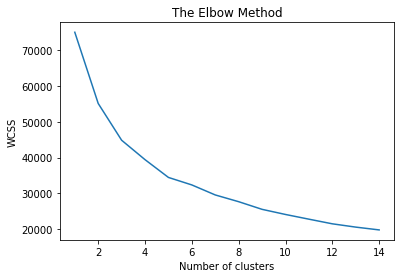

In [291]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(d3)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

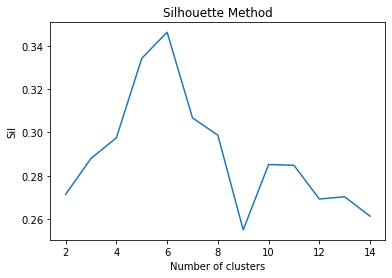

2:0.2713707501948417
3:0.28798055988466387
4:0.2975517880773451
5:0.33435170815489196
6:0.3464245186166792
7:0.3067724507466539
8:0.2987274653611441
9:0.25488365163514703
10:0.2851689316941956
11:0.2848140634428477
12:0.26920255949641897
13:0.27023692973763297
14:0.2612398758315869


In [292]:
# Using the silhouette method to find the optimal number of clusters
from sklearn.metrics import silhouette_score

sil = []

for k in range(2, 15):
  kmeans = KMeans(n_clusters = k).fit(d3)  
  preds = kmeans.fit_predict(d3)
  sil.append(silhouette_score(d3, preds, metric = 'euclidean'))


plt.plot(range(2, 15), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil)):
 print(str(i+2) +":"+ str(sil[i]))

In [294]:
#максимальное значение показателя достигается при количестве кластеров = 6

In [295]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 6, init = 'k-means++', random_state = 0).fit_predict(d3)
kms = KMeans(n_clusters = 6, random_state = 0).fit(d3)
pd.DataFrame(kms.cluster_centers_, columns = ['Sex','Age','Education','Satisfaction_with_life','Employment_status','Religion','Interpersonal_trust','Satisfaction_with_financial_situation_of_household']).round(2)

,Sex,Age,Education,Satisfaction_with_life,Employment_status,Religion,Interpersonal_trust,Satisfaction_with_financial_situation_of_household
0,1.00,0.30,0.57,0.63,0.31,1.00,0.0,0.53
1,1.00,0.33,0.64,0.67,0.27,0.69,1.0,0.59
2,0.00,0.36,0.32,0.55,0.52,1.00,0.0,0.41
3,0.00,0.34,0.63,0.69,0.34,0.73,1.0,0.59
4,0.00,0.26,0.75,0.73,0.31,1.00,0.0,0.63
5,0.53,0.32,0.62,0.65,0.30,-0.00,0.0,0.54


In [296]:
km = KMeans(n_clusters = 6, init = 'k-means++', random_state = 0).fit_predict(d3)
kms = KMeans(n_clusters = 6, random_state = 0).fit(d3)
pd.DataFrame(kms.cluster_centers_, columns = ['Sex','Age','Education','Satisfaction_with_life','Employment_status','Religion','Interpersonal_trust','Satisfaction_with_financial_situation_of_household'])

,Sex,Age,Education,Satisfaction_with_life,Employment_status,Religion,Interpersonal_trust,Satisfaction_with_financial_situation_of_household
0,1.000000e+00,0.299267,0.569657,0.633524,0.311913,1.000000e+00,5.773160e-15,0.531657
1,1.000000e+00,0.331324,0.644270,0.674515,0.268767,6.862293e-01,1.000000e+00,0.588626
2,8.881784e-15,0.357092,0.324724,0.554294,0.521344,9.998486e-01,5.273559e-15,0.409838
3,2.220446e-16,0.341671,0.632120,0.685252,0.337652,7.274274e-01,1.000000e+00,0.587955
4,1.049161e-14,0.262119,0.745345,0.728196,0.305033,1.000000e+00,5.329071e-15,0.633792
5,5.349321e-01,0.317418,0.618840,0.650192,0.302015,-1.065814e-14,4.773959e-15,0.543315


In [297]:
# Less features
X = d3[:, [0, 2, 4, 6, 7]]

In [298]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 6, init = 'k-means++', random_state = 0).fit_predict(X)
kms = KMeans(n_clusters = 6, random_state = 0).fit(X)
pd.DataFrame(kms.cluster_centers_, columns = ['Sex', 'Education', 'Employment_status', 'Interpersonal_trust', 'Satisfaction_with_financial_situation_of_household']).round(2)

,Sex,Education,Employment_status,Interpersonal_trust,Satisfaction_with_financial_situation_of_household
0,0.0,0.72,0.11,0.0,0.57
1,1.0,0.46,0.62,0.0,0.48
2,0.0,0.63,0.34,1.0,0.59
3,1.0,0.64,0.27,1.0,0.59
4,0.0,0.44,0.59,0.0,0.50
5,1.0,0.66,0.10,0.0,0.57
